# Principal Component Analysis

**Deadline: April 13**

Principal Component Analysis (PCA) is a linear dimensionality reduction technique that can be utilized for extracting information from a high-dimensional space by projecting it into a lower-dimensional sub-space. It tries to preserve the essential parts that have more variation of the data and remove the non-essential parts with fewer variation.

Dimensions are nothing but features that represent the data. For example, A 28 X 28 image has 784 picture elements (pixels) that are the dimensions or features which together represent that image.

One important thing to note about PCA is that it is an Unsupervised dimensionality reduction technique, you can cluster the similar data points based on the feature correlation between them without any supervision (or labels).

PCA is a statistical procedure that uses an orthogonal transformation to convert a set of observations of possibly correlated variables (entities each of which takes on various numerical values) into a set of values of linearly uncorrelated variables called principal components.


#### Main usage of PCA
* Data Visualization
When working on any data related problem, extensive data exploration like finding out how the variables are correlated or understanding the distribution of a few variables is crucial. Considering that there are a large number of variables or dimensions along which the data is distributed, visualization can be a challenge and almost impossible. Using dimensionality reduction, data can be projected into a lower dimension, thereby allowing you to visualize the data in a 2D or 3D space.


* Speeding Machine Learning Algorithm
Since PCA's main idea is dimensionality reduction, you can leverage that to speed up your machine learning algorithm's training and testing time considering your data has a lot of features, and the ML algorithm's learning is too slow.

#### Principal Component
Principal components are the key to PCA; they represent what's underneath the hood of your data. In a layman term, when the data is projected into a lower dimension (assume three dimensions) from a higher space, the three dimensions are nothing but the three Principal Components that captures (or holds) most of the variance (information) of your data.

Principal components have both direction and magnitude. The direction represents across which principal axes the data is mostly spread out or has most variance and the magnitude signifies the amount of variance that Principal Component captures of the data when projected onto that axis. The principal components are a straight line, and the first principal component holds the most variance in the data. Each subsequent principal component is orthogonal to the last and has a lesser variance. In this way, given a set of x correlated variables over y samples you achieve a set of u uncorrelated principal components over the same y samples.

The reason you achieve uncorrelated principal components from the original features is that the correlated features contribute to the same principal component, thereby reducing the original data features into uncorrelated principal components; each representing a different set of correlated features with different amounts of variation.

Each principal component represents a percentage of total variation captured from the data.

#### PCA on iris dataset
In this section we will decompose with PCA very simple 4-dimensional data set.  The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other.

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [3]:
df_iris = sns.load_dataset('iris')
df_iris.head(5)

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

In the case that the dimensionality of the data allows it, it is good practice to see how each pair of features correlate with each other. In the following link you will find more methods for visualizing multidimensional data using matplotlib and seaborn libraries
https://towardsdatascience.com/the-art-of-effective-visualization-of-multi-dimensional-data-6c7202990c57

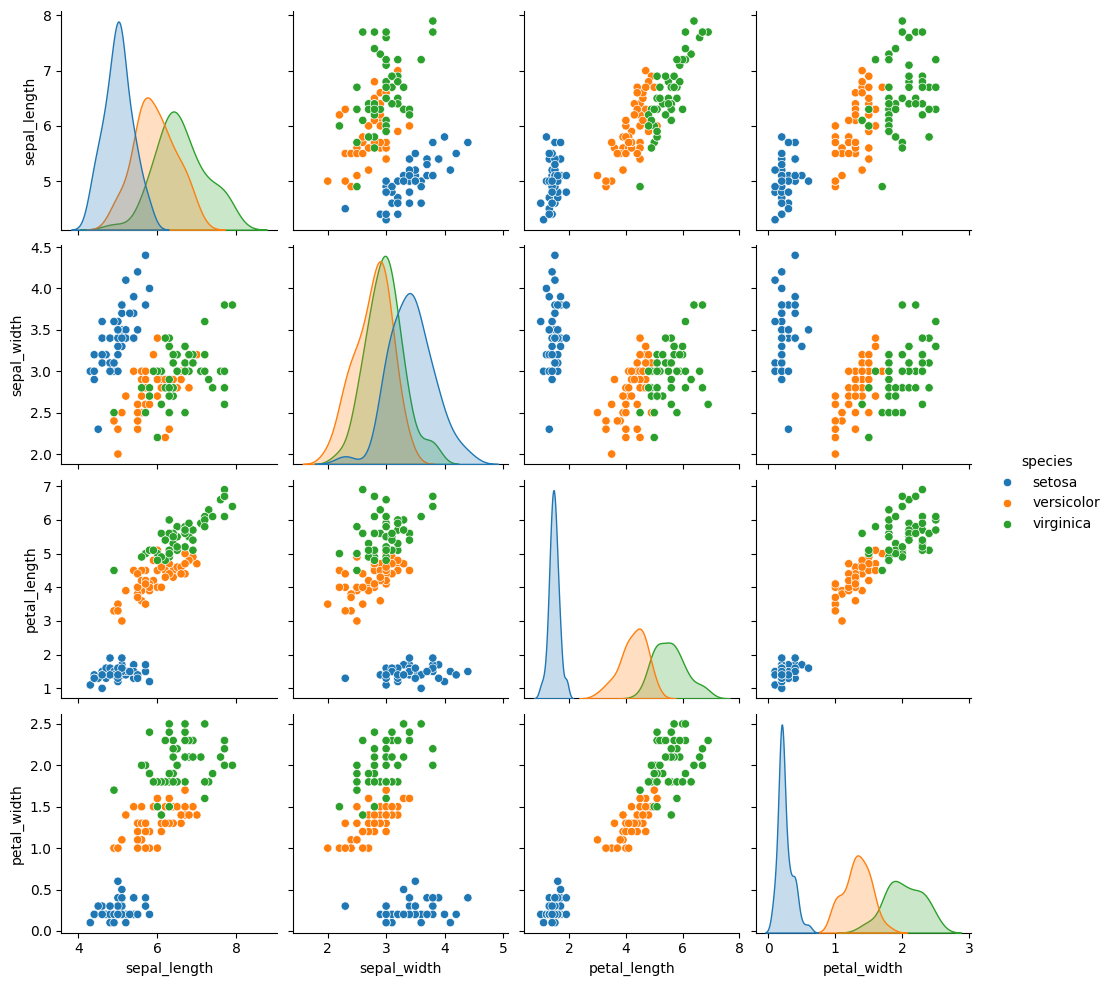

In [4]:
sns.pairplot(df_iris, hue='species')

###Exercise 1 - Which features are strongly correlated with each other? Calculate correlations using the appropriate function and compare with graphs.Visualize data using different method.

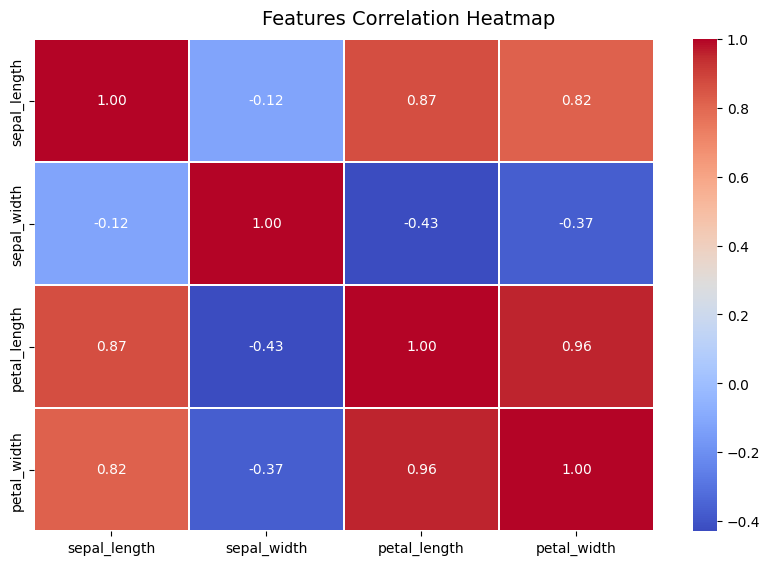

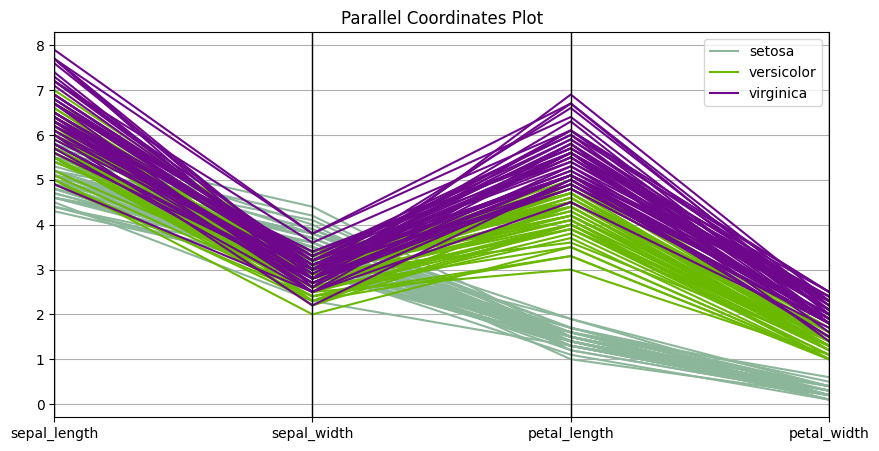

In [5]:
f, ax = plt.subplots(figsize=(10, 6))
corr = df_iris.select_dtypes(include=['number']).corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Features Correlation Heatmap', fontsize=14)

from pandas.plotting import parallel_coordinates

plt.figure(figsize=(10, 5))
parallel_coordinates(df_iris, 'species')
plt.title('Parallel Coordinates Plot')
plt.show()


### Standardize the Data

Since PCA yields a feature subspace that maximizes the variance along the axes, it makes sense to standardize the data, especially, if it was measured on different scales. Although, all features in the Iris dataset were measured in centimeters, let us continue with the transformation of the data onto unit scale (mean=0 and variance=1), which is a requirement for the optimal performance of many machine learning algorithms.


We create a list of column names that we want to use as features.
The Iris collection contains 4 features:
sepal_length
sepal_width
petal_length
petal_width
We do not include the species column here, because it is the label (i.e., the class of the flower).



In [6]:
features_iris = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
x_iris = df_iris.loc[:, features_iris].values

df_iris.loc[:, features_iris].values

We retrieve all rows : and only columns from the features_iris list.

.values converts them into a NumPy array for easy further processing.

The x_iris contains only numeric features (not labels).

df_iris.loc[:, ['species']].values

We retrieve only the "species" column (flower classes: Setosa, Versicolor, Virginica).

.values converts the data to a NumPy array.

y_iris contains the class labels.

In [7]:
y_iris = df_iris.loc[:,['species']].values

In [8]:
x_iris = StandardScaler().fit_transform(x_iris)

What is StandardScaler()?
This is a tool from sklearn.preprocessing that standardizes data according to the formula:
Z= X-𝜇/σ

where:

𝑋
X is the original value

𝜇
μ is the average feature,

𝜎
σ is the standard deviation.

After this operation, all features have an average of 0 and a standard deviation of 1.

fit_transform(x_iris)

fit() calculates the mean and standard deviation for each feature,

transforms values to a new scale,

fit_transform() takes both steps at once.

In [9]:
df_iris_standarize = pd.DataFrame(data = x_iris, columns = features_iris)
df_iris_standarize['species'] = df_iris['species']
df_iris_standarize.head(15)

sepal_length  sepal_width  petal_length  petal_width species
0      -0.900681     1.019004     -1.340227    -1.315444  setosa
1      -1.143017    -0.131979     -1.340227    -1.315444  setosa
2      -1.385353     0.328414     -1.397064    -1.315444  setosa
3      -1.506521     0.098217     -1.283389    -1.315444  setosa
4      -1.021849     1.249201     -1.340227    -1.315444  setosa
5      -0.537178     1.939791     -1.169714    -1.052180  setosa
6      -1.506521     0.788808     -1.340227    -1.183812  setosa
7      -1.021849     0.788808     -1.283389    -1.315444  setosa
8      -1.748856    -0.362176     -1.340227    -1.315444  setosa
9      -1.143017     0.098217     -1.283389    -1.447076  setosa
10     -0.537178     1.479398     -1.283389    -1.315444  setosa
11     -1.264185     0.788808     -1.226552    -1.315444  setosa
12     -1.264185    -0.131979     -1.340227    -1.447076  setosa
13     -1.870024    -0.131979     -1.510739    -1.447076  setosa
14     -0.052506     2.169988     -1.453901    -1.315444  setosa

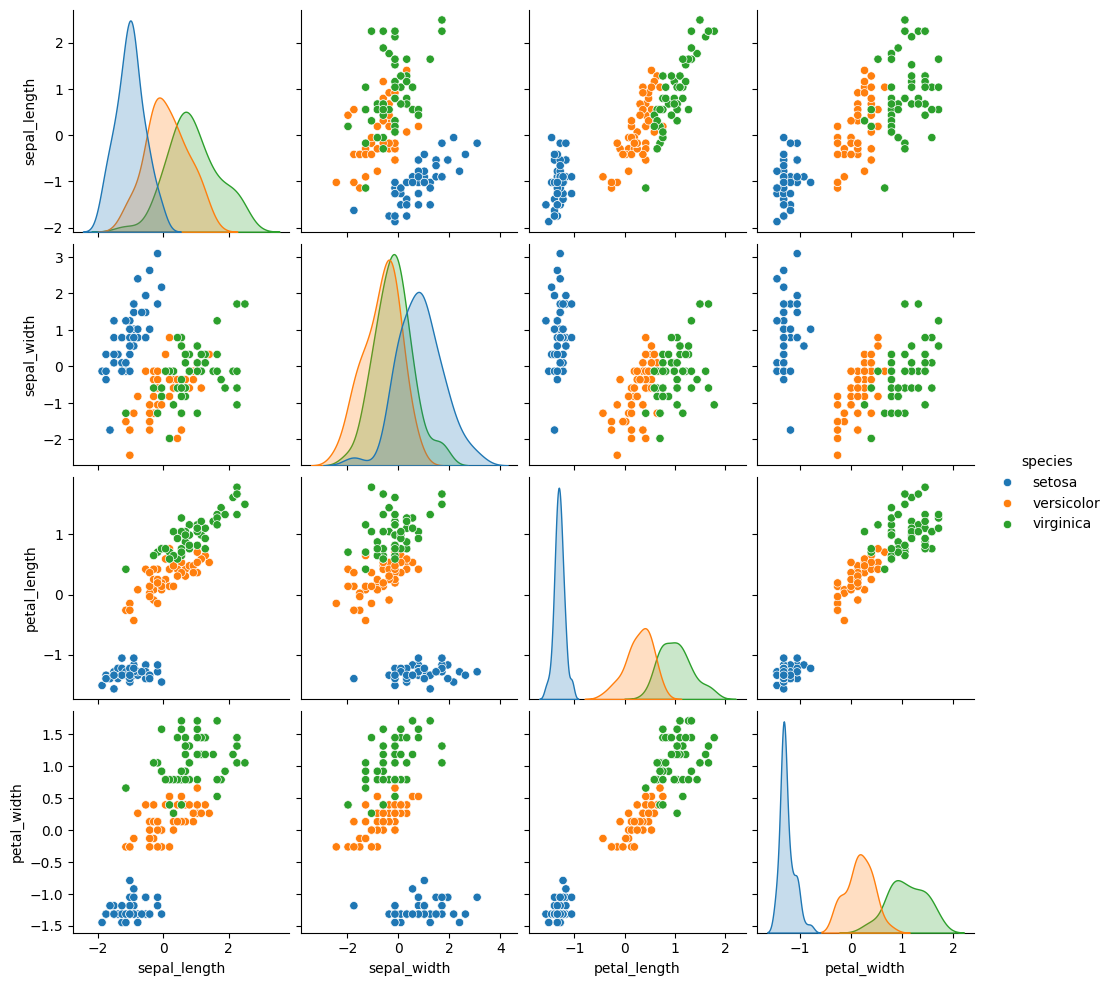

In [10]:
sns.pairplot(df_iris_standarize, hue='species')

We can see that the distributions are now standardized

### PCA Projection to 2D

In [11]:
pca_iris = PCA(n_components=2)

In [12]:
principalComponents_iris = pca_iris.fit_transform(x_iris)

In [13]:
principalDf_iris = pd.DataFrame(data = principalComponents_iris ,columns = ['principal component 1', 'principal component 2'])


In [14]:
finalDf_iris = pd.concat([principalDf_iris, df_iris[['species']]], axis = 1)
finalDf_iris.head(15)

principal component 1  principal component 2 species
0               -2.264703               0.480027  setosa
1               -2.080961              -0.674134  setosa
2               -2.364229              -0.341908  setosa
3               -2.299384              -0.597395  setosa
4               -2.389842               0.646835  setosa
5               -2.075631               1.489178  setosa
6               -2.444029               0.047644  setosa
7               -2.232847               0.223148  setosa
8               -2.334640              -1.115328  setosa
9               -2.184328              -0.469014  setosa
10              -2.166310               1.043691  setosa
11              -2.326131               0.133078  setosa
12              -2.218451              -0.728676  setosa
13              -2.633101              -0.961507  setosa
14              -2.198741               1.860057  setosa


### Visualize 2D Projection

Use a PCA projection to 2d to visualize the entire data set. You should plot different classes using different colors or shapes.

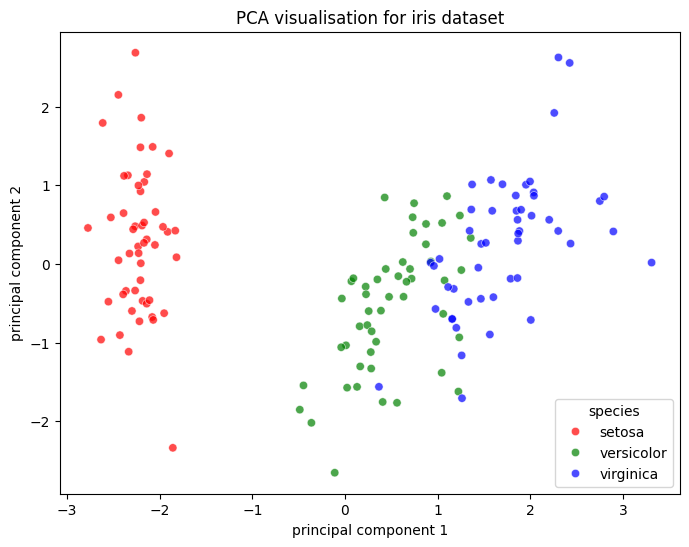

In [15]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=finalDf_iris['principal component 1'],
                y=finalDf_iris['principal component 2'],
                hue=finalDf_iris['species'],
                palette=['red', 'green', 'blue'],
                alpha=0.7)
plt.xlabel('principal component 1')
plt.ylabel('principal component 2')
plt.title('PCA visualisation for iris dataset')
plt.show()

### Explained Variance

The explained variance tells us how much information (variance) can be attributed to each of the principal components.

In [16]:
pca_iris.explained_variance_ratio_

array([0.72962445, 0.22850762])

Together, the first two principal components contain 95.80% of the information. The first principal component contains 72.77% of the variance and the second principal component contains 23.03% of the variance. The third and fourth principal component contained the rest of the variance of the dataset.

### limitations of PCA

* PCA is not scale invariant. check: we need to scale our data first.
    
* The directions with largest variance are assumed to be of the most interest

* Only considers orthogonal transformations (rotations) of the original variables

* PCA is only based on the mean vector and covariance matrix. Some distributions (multivariate normal) are characterized by this, but some are not.

* If the variables are correlated, PCA can achieve dimension reduction. If not, PCA just orders them according to their variances.




### Exercise 2 - Perform PCA for breast cancer dataset

---


 You can find this dataset it in the scikit learn library, import it and convert to pandas dataframe, original label are '0' and '1' for better readability change these names to: 'benign' and 'malignant'

* Visualizes correlations between pairs of features

* Perform PCA and visualize the data

* Examine  explained variance, draw a plot showing relation between total explained variance and number of principal components used


* Use recursive feature elimination (available in scikit-learn module) or another feature ranking algorithm to split 30 features to on 15 "more important" and "less important" features. Then repeat the last step from the full data set - draw a plot showing relation between total explained variance and number of principal components used for all 3 cases. Explain the result briefly.

In [17]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)

df["label"] = cancer.target
df["label"] = df["label"].map({0: "malignant", 1: "benign"})

cancer_x = df.drop("label", axis=1)
cancer_y = df["label"]

cancer_x_columns = cancer_x.columns

cancer_x = StandardScaler().fit_transform(cancer_x)

pca_breast_cancer = PCA(n_components=2)

principalComponents_breast_cancer = pca_breast_cancer.fit_transform(cancer_x)
principalDf_breast_cancer = pd.DataFrame(data = principalComponents_breast_cancer ,columns = ['principal component 1', 'principal component 2'])

finalDf_breast_cancer = pd.concat([principalDf_breast_cancer, df["label"]], axis = 1)

finalDf_breast_cancer.head(15)

principal component 1  principal component 2      label
0                9.192837               1.948583  malignant
1                2.387802              -3.768172  malignant
2                5.733896              -1.075174  malignant
3                7.122953              10.275589  malignant
4                3.935302              -1.948072  malignant
5                2.380247               3.949929  malignant
6                2.238883              -2.690031  malignant
7                2.143299               2.340244  malignant
8                3.174924               3.391813  malignant
9                6.351747               7.727174  malignant
10              -0.810414              -2.659275  malignant
11               2.651100               0.066568  malignant
12               8.185034               2.700976  malignant
13               0.342126              -0.968279  malignant
14               4.342379               4.861083  malignant

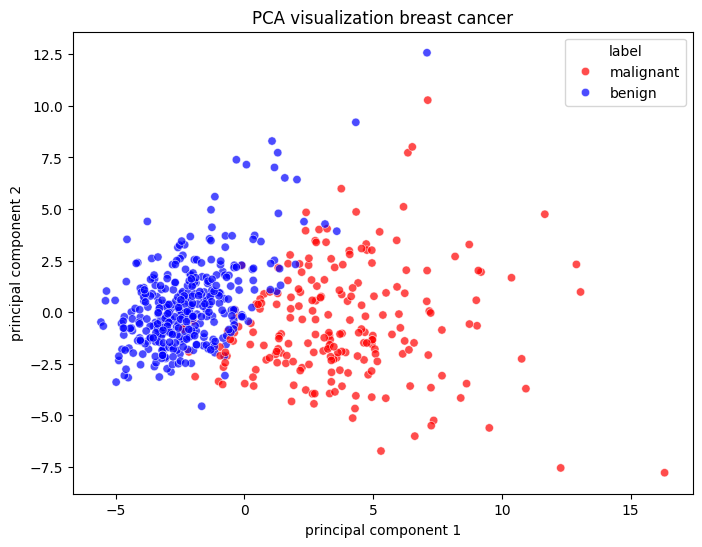

In [18]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=finalDf_breast_cancer['principal component 1'],
                y=finalDf_breast_cancer['principal component 2'],
                hue=finalDf_breast_cancer['label'],
                palette=['red', 'blue'],
                alpha=0.7)
plt.xlabel('principal component 1')
plt.ylabel('principal component 2')
plt.title('PCA visualization breast cancer')
plt.show()

In [19]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

estimator = LogisticRegression(max_iter=10000)  # You can use other estimators
rfe = RFE(estimator, n_features_to_select=15)

rfe.fit(cancer_x, cancer_y)

selected_features = cancer_x_columns[rfe.support_]
less_important_features = cancer_x_columns[~rfe.support_]

print("Selected features:", selected_features)
print("Less important features:", less_important_features)

Selected features: Index(['mean area', 'mean compactness', 'mean concave points', 'radius error',
       'perimeter error', 'area error', 'compactness error', 'worst radius',
       'worst texture', 'worst perimeter', 'worst area', 'worst smoothness',
       'worst concavity', 'worst concave points', 'worst symmetry'],
      dtype='object')
Less important features: Index(['mean radius', 'mean texture', 'mean perimeter', 'mean smoothness',
       'mean concavity', 'mean symmetry', 'mean fractal dimension',
       'texture error', 'smoothness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst compactness', 'worst fractal dimension'],
      dtype='object')


In [48]:
def pca_analysis(data, n_components_range):
    total_explained_variances = []
    for n_components in n_components_range:
        pca = PCA(n_components=n_components)
        pca.fit_transform(data)
        total_explained_variances.append(sum(pca.explained_variance_ratio_))
    return total_explained_variances

full_data_variance = pca_analysis(StandardScaler().fit_transform(cancer_x), range(1, 31))

selected_features_indices = [cancer_x_columns.get_loc(col) for col in selected_features]
selected_features_variance = pca_analysis(StandardScaler().fit_transform(cancer_x[:, selected_features_indices]), range(1, 16))

less_important_features_indices = [cancer_x_columns.get_loc(col) for col in less_important_features]
less_important_features_variance = pca_analysis(StandardScaler().fit_transform(cancer_x[:, less_important_features_indices]), range(1, 16))

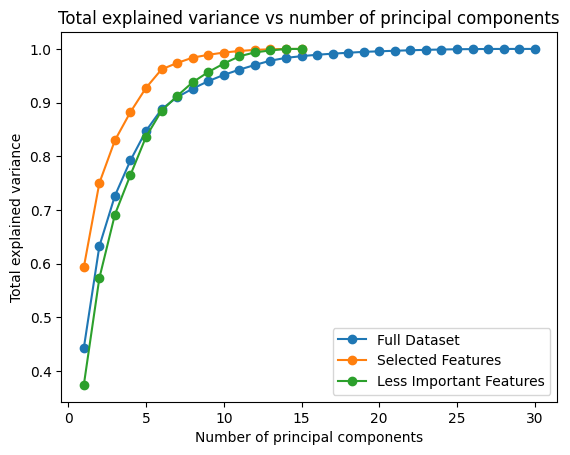

In [49]:
plt.plot(range(1, 31), full_data_variance, marker='o', label='Full Dataset')
plt.plot(range(1, 16), selected_features_variance, marker='o', label='Selected Features')
plt.plot(range(1, 16), less_important_features_variance, marker='o', label='Less Important Features')
plt.xlabel('Number of principal components')
plt.ylabel('Total explained variance')
plt.title('Total explained variance vs number of principal components')
plt.legend()
plt.show()

The total explained variance plot clearly indicate that the PCA done on the "more important" features obtained from RFE explains more total variance for a smaller number of principal components than the less important features. All curves approach 1 as the number of principal components approaches the number of features. This suggests that the more important features carry more information useful for classyfying a data point.

 ### Exercise 3 - Perform PCA for penguins 🐧
 ---


1. Download the database files and load the data contained in the penguins_size.csv file into the DataFrame structure (https://github.com/remijul/dataset/blob/master/penguins_size.csv).

  The loaded data will be divided into seven columns:

  • species – penguin species

  • island – the island the individual inhabits

  • culmen_lenght_mm – bill length in millimeters

  • culmen_depth_mm – beak thickness in millimeters

  • flipper_length_mm – wing length in millimeters

  • body_mass_g – body weight in grams

  • sex – gender of the individual

2. Based on the data in the species column, generate a vector containing numerical labels of individuals.
3. Apply the PCA algorithm to determine the principal components. Use parameters for this purpose
culmen_lenght_mm, culmen_depth_mm, flipper_length_mm and body_mass_g. Remember to standardize your data.
4. Check what part of the variability is explained by individual main components and determine
formulas with which the component values can be calculated.
5. Reapply the PCA algorithm, this time to non-standardized data.
6. Visualize the standardized and unstandardized data on the PC1-PC2 plane and the
in the PC1-PC2-PC3 space. Did the standardization of the data significantly affect the resulting graphs?
In which case is the separation of species in the graphs better?
7. Check different method for standarization (you can choose freely) and explain
why did you choose it and how did it affect the data?

In [22]:
penguins_df = pd.read_csv('https://github.com/remijul/dataset/blob/master/penguins_size.csv?raw=true')
penguins_df.head()

species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen              39.1             18.7              181.0   
1  Adelie  Torgersen              39.5             17.4              186.0   
2  Adelie  Torgersen              40.3             18.0              195.0   
3  Adelie  Torgersen               NaN              NaN                NaN   
4  Adelie  Torgersen              36.7             19.3              193.0   

   body_mass_g     sex  
0       3750.0    MALE  
1       3800.0  FEMALE  
2       3250.0  FEMALE  
3          NaN     NaN  
4       3450.0  FEMALE

In [23]:
penguins_df = penguins_df.dropna()

In [24]:
species_labels, species_names = pd.factorize(penguins_df['species'])
penguins_df["species_encoded"] = species_labels
penguins_df.head()

species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen              39.1             18.7              181.0   
1  Adelie  Torgersen              39.5             17.4              186.0   
2  Adelie  Torgersen              40.3             18.0              195.0   
4  Adelie  Torgersen              36.7             19.3              193.0   
5  Adelie  Torgersen              39.3             20.6              190.0   

   body_mass_g     sex  species_encoded  
0       3750.0    MALE                0  
1       3800.0  FEMALE                0  
2       3250.0  FEMALE                0  
4       3450.0  FEMALE                0  
5       3650.0    MALE                0

In [25]:
x_penguins = penguins_df[["culmen_length_mm", "culmen_depth_mm", "flipper_length_mm", "body_mass_g"]]
y_penguins = penguins_df["species_encoded"]

x_penguins_standard = StandardScaler().fit_transform(x_penguins)

In [26]:
def make_pca(x, n_components):
    pca = PCA(n_components=n_components)
    principalComponents = pca.fit_transform(x)
    principalDf = pd.DataFrame(data = principalComponents ,columns = ['principal component ' + str(i) for i in range(1, n_components+1)])
    return principalDf, pca

standard_principalDf, standard_pca = make_pca(x_penguins_standard, 3)
standard_explained_variance = standard_pca.explained_variance_ratio_
print(f"Standardized data components variance: {standard_explained_variance}")

Standardized data components variance: [0.68641678 0.19448404 0.09215558]


The formula for each principal component will be: PCi = W[i, 0] * culmen_length_mm + W[i, 1] * culmen_depth_mm + W[i, 2] * flipper_length_mm + W[i, 3] * body_mass_g

In [27]:
W = standard_pca.components_
for i in range(3):
    formula = f"PC{i+1} = {W[i, 0]:.4f} * culmen_length_mm + {W[i, 1]:.4f} * culmen_depth_mm + {W[i, 2]:.4f} * flipper_length_mm + {W[i, 3]:.4f} * body_mass_g"
    print(formula)

PC1 = 0.4533 * culmen_length_mm + -0.3995 * culmen_depth_mm + 0.5768 * flipper_length_mm + 0.5497 * body_mass_g
PC2 = 0.6020 * culmen_length_mm + 0.7949 * culmen_depth_mm + 0.0051 * flipper_length_mm + 0.0759 * body_mass_g
PC3 = 0.6414 * culmen_length_mm + -0.4278 * culmen_depth_mm + -0.2369 * flipper_length_mm + -0.5912 * body_mass_g


In [28]:
principalDf, pca = make_pca(x_penguins, 3)
explained_variance = pca.explained_variance_ratio_
print(f"Non-standardized data components variance: {explained_variance}")

Non-standardized data components variance: [9.99893266e-01 7.81736226e-05 2.49272464e-05]


In [29]:
def plot_2d(X_pca, title):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=penguins_df['species'])
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title(title)
    plt.legend()
    plt.tight_layout()
    plt.show()

def plot_3d(X_pca, title):
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=species_labels, cmap='Set1')
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_zlabel('PC3')
    plt.title(title)
    plt.legend(handles=scatter.legend_elements()[0], labels=list(species_names))
    plt.show()

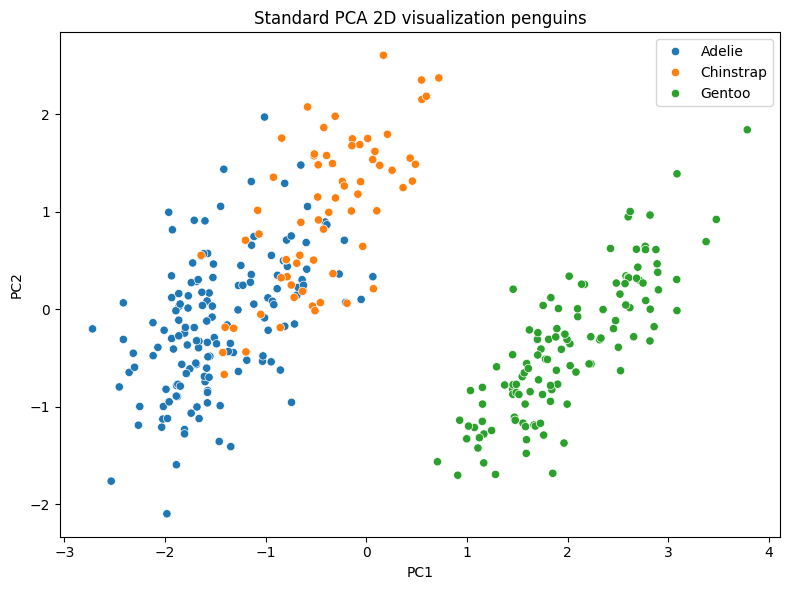

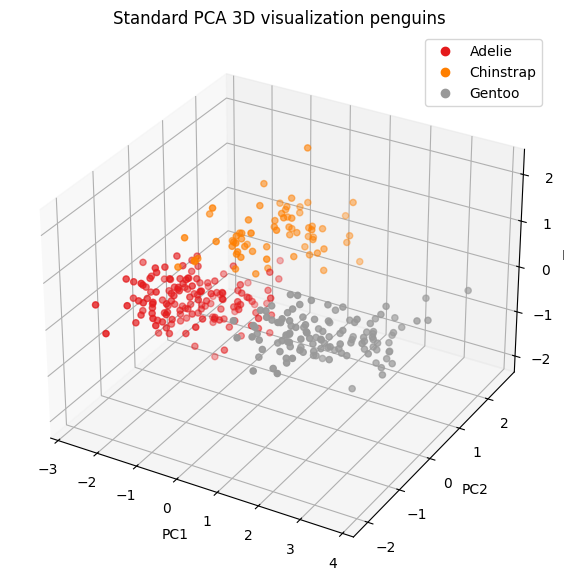

In [30]:
plot_2d(standard_principalDf.values, 'Standard PCA 2D visualization penguins')
plot_3d(standard_principalDf.values, 'Standard PCA 3D visualization penguins')

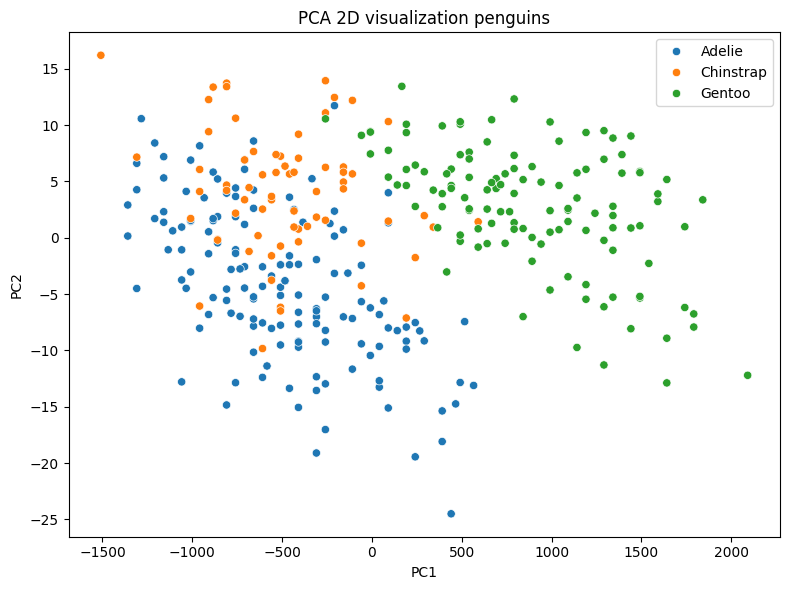

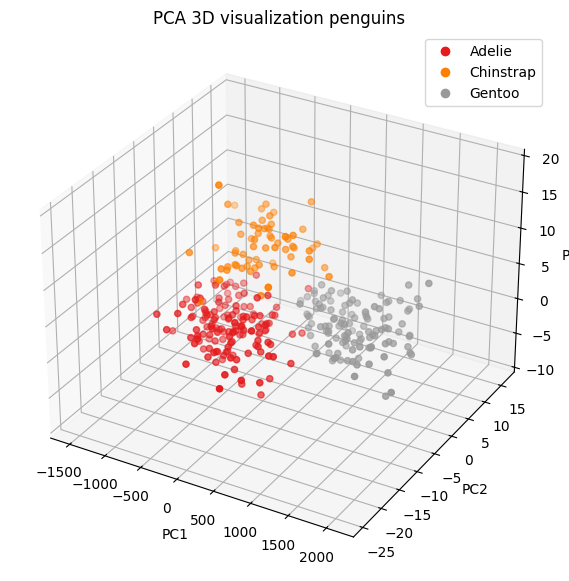

In [31]:
plot_2d(principalDf.values, 'PCA 2D visualization penguins')
plot_3d(principalDf.values, 'PCA 3D visualization penguins')

Looking at the plots for the 2 component PCA, it is clear that the standardized data yielded better results - there is a clear separation between the Gento and the 2 other species along the PC1 axis, the other two species have some overlap, but it isn't as big as the overlap in the non-standard data - all 3 species overlap there. In the case of 3 component PCA - the 2 projections look quite similar and it doesn't seem like the standardized data did a much better job at separating different classes in this 3 dimensional space than the non-standard data.


Explained Variance (MinMaxScaler):
[0.69664771 0.19135946 0.08324636]


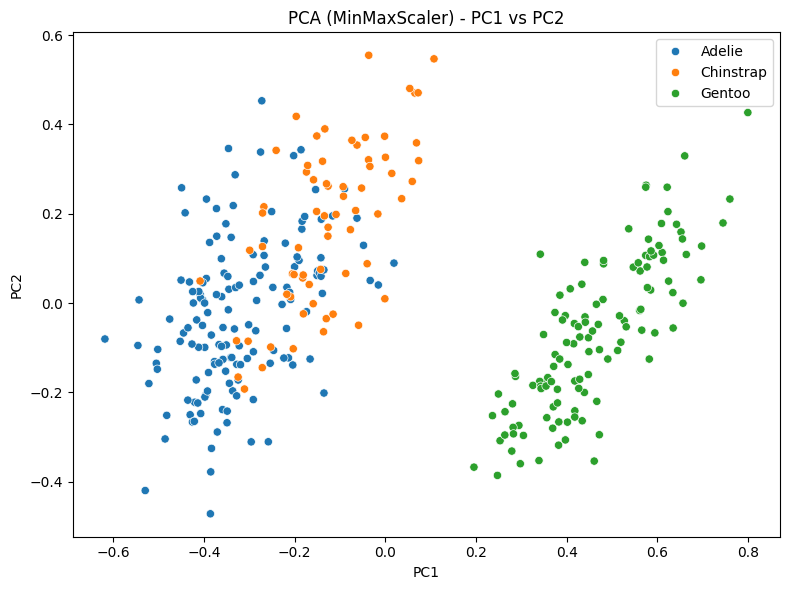

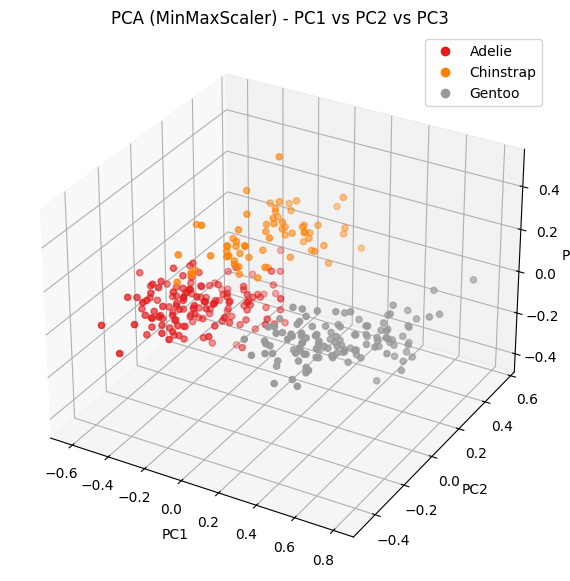


Explained Variance (RobustScaler):
[0.68688152 0.19430319 0.09200883]


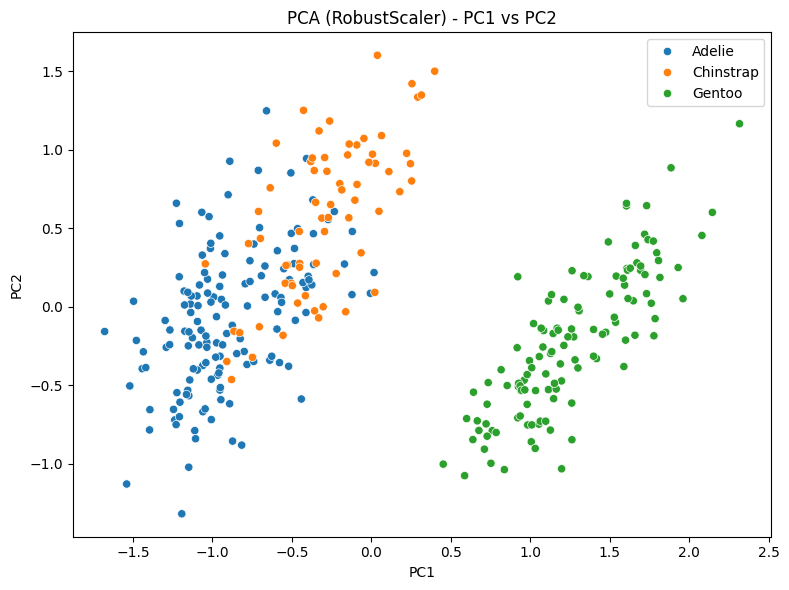

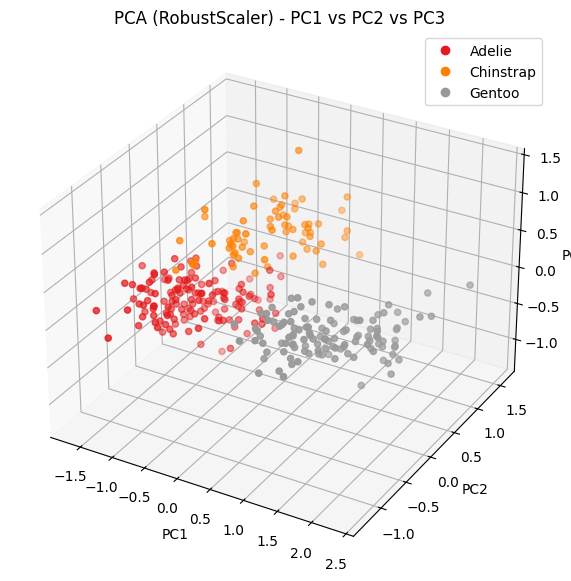

In [32]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler

scalers = {
    'MinMaxScaler': MinMaxScaler(),
    'RobustScaler': RobustScaler()
}

for name, scaler in scalers.items():
    x_penguins_scaled = scaler.fit_transform(x_penguins)
    X_pca, pca = make_pca(x_penguins_scaled, 3)

    print(f"\nExplained Variance ({name}):")
    print(pca.explained_variance_ratio_)

    plot_2d(X_pca.values, f"PCA ({name}) - PC1 vs PC2")
    plot_3d(X_pca.values, f"PCA ({name}) - PC1 vs PC2 vs PC3")


I have decided to use 2 different scalers from the sklearn preprocessing package to compare them against the stardard scaler - the MinMaxScaler and the RobustScaler. The MinMaxScaler works by transforming features into a given range, by default it is from 0 to 1, using the following formula: X_scaled = (X - X.min()) / (X.max() - X.min()). The robust scaler works by scaling the featues based on their interquartile range (IQR), it is more robust to outliers, compared to MinMaxScaler. It uses the following formula to scale the data: X_scaled = (X - Q1) / (Q3 - Q1).  

Observing the plots prepared for these 2 different scalers, very minor differences can be seen. It seems like the scaling technique doesn't matter as much - at least in the case of this particular dataset. A big difference exists between the scaled and non-scaled data transformation, but the difference between the 3 different scaling techniques are minor.

###Exercise 4 - Try to perform PCA on yours AMP data.

*   Use steps from tutorial or from one of previous task.
*   Write your observations and conclusions.




In [33]:
amp_data = pd.read_csv("combined_data_with_features.csv")
amp_data.head()

id                                         sequence  length  \
0     dbAMP_13649                              MVDRGWGNHAGLFGKGSIV      19   
1  uniprot_P80704                              MYAFSYSTPRTLDEVSAAS      19   
2  uniprot_P14709       DSSEEKFLRRLRRFDEGRYGPYQPFVPPPLYPQPYQPYQPQY      42   
3     dbAMP_23885                           FFGSMIGALAKGLPSLISLIKK      22   
4     dbAMP_15248  DYKFHVCDPSFDEKDCDFECKEFGHPGGYCRPDRVQPRIRMCYCTDR      47   

   label  molecular_weight  isoelectric_point  hydrophobicity  \
0      1         2001.2712           8.518997        0.047368   
1      0         2096.2731           4.369066       -0.115789   
2      0         5206.7373           8.299031       -1.476190   
3      1         2291.8358          10.302064        1.040909   
4      1         5666.3060           5.493398       -1.087234   

   instability_index  aromaticity  helix_fraction  sheet_fraction  \
0         -23.710526     0.105263        0.210526        0.421053   
1          30.431579     0.157895        0.315789        0.315789   
2         113.850000     0.214286        0.166667        0.357143   
3          15.477273     0.090909        0.454545        0.318182   
4          41.372340     0.148936        0.148936        0.319149   

   turn_fraction  
0       0.315789  
1       0.368421  
2       0.309524  
3       0.409091  
4       0.234043

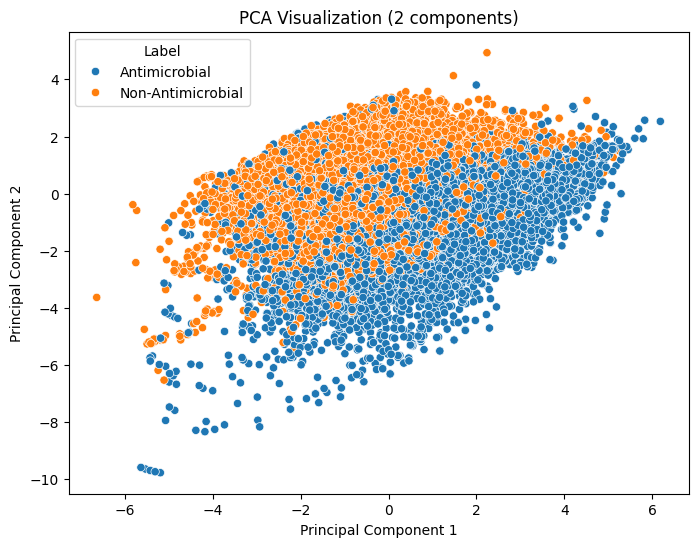

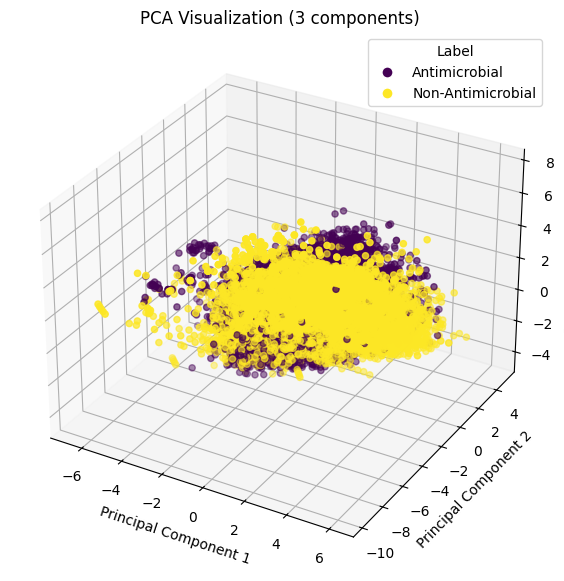

Explained Variance Ratio (2 components): [0.28825459 0.20298297]
Explained Variance Ratio (3 components): [0.28825459 0.20298297 0.15531451]


In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D


labels = {
    0: 'Non-Antimicrobial',
    1: 'Antimicrobial'
}
amp_data['label_str'] = amp_data['label'].map(labels)

features = amp_data.drop(['label', 'label_str', 'sequence', 'id'], axis=1).columns

x_amp = StandardScaler().fit_transform(amp_data[features])

pca_2 = PCA(n_components=2)
principalComponents_2 = pca_2.fit_transform(x_amp)
principalDf_2 = pd.DataFrame(data=principalComponents_2, columns=['principal component 1', 'principal component 2'])
finalDf_2 = pd.concat([principalDf_2, amp_data[['label_str']]], axis=1)

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=finalDf_2['principal component 1'],
    y=finalDf_2['principal component 2'],
    hue=finalDf_2['label_str']
)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization (2 components)')
plt.legend(title='Label')
plt.show()

pca_3 = PCA(n_components=3)
principalComponents_3 = pca_3.fit_transform(x_amp)
principalDf_3 = pd.DataFrame(data=principalComponents_3, columns=['principal component 1', 'principal component 2', 'principal component 3'])
finalDf_3 = pd.concat([principalDf_3, amp_data[['label', 'label_str']]], axis=1)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

label_numeric = finalDf_3['label']
label_strings = finalDf_3['label_str']

scatter = ax.scatter(
    finalDf_3['principal component 1'],
    finalDf_3['principal component 2'],
    finalDf_3['principal component 3'],
    c=label_numeric,
    cmap='viridis'
)

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.title('PCA Visualization (3 components)')

unique_labels = label_numeric.unique()
legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w',
               label=labels[lbl], markerfacecolor=plt.cm.viridis(i / (len(unique_labels) - 1)),
               markersize=8)
    for i, lbl in enumerate(unique_labels)
]
ax.legend(handles=legend_elements, title='Label')

plt.show()

print("Explained Variance Ratio (2 components):", pca_2.explained_variance_ratio_)
print("Explained Variance Ratio (3 components):", pca_3.explained_variance_ratio_)


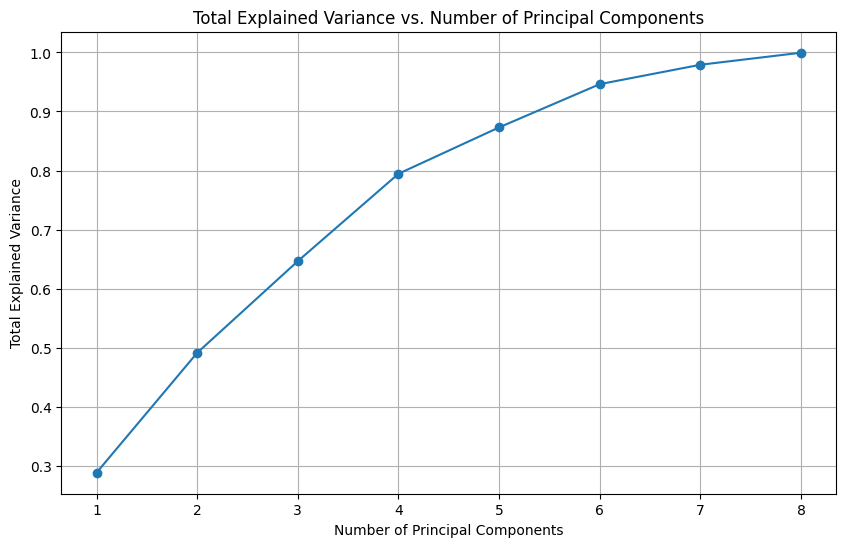

In [35]:
import matplotlib.pyplot as plt

def pca_analysis(data, n_components_range):
    total_explained_variances = []
    for n_components in n_components_range:
        pca = PCA(n_components=n_components)
        pca.fit_transform(data)
        total_explained_variances.append(sum(pca.explained_variance_ratio_))
    return total_explained_variances

n_components_range = range(1, len(x_amp[0]))
full_data_variance = pca_analysis(x_amp, n_components_range)

plt.figure(figsize=(10, 6))
plt.plot(n_components_range, full_data_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Total Explained Variance')
plt.title('Total Explained Variance vs. Number of Principal Components')
plt.xticks(n_components_range)
plt.grid(True)
plt.show()

Even the 2D PCA showed some capability of separating the 2 classes on the plane, it is hard to determine the separation of the data in the case of the 3D PCA, becuase of the large number of 3D datapoints, visualized on a 2D plot. The total variance explained by the particular number of principal components showed that 6 PCs explain over 90%  of the variance in the dataset, showing that there is a possibility to reduce the dimensionality of the dataset without losing much information.

## Kernel PCA

PCA is a linear method. That is it can only be applied to datasets which are linearly separable. It does an excellent job for datasets, which are linearly separable. But, if we use it to non-linear datasets, we might get a result which may not be the optimal dimensionality reduction. Kernel PCA uses a kernel function to project dataset into a higher dimensional feature space, where it is linearly separable. It is similar to the idea of Support Vector Machines (SVM).

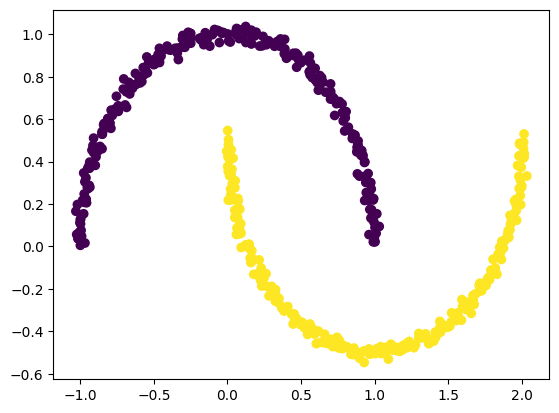

In [36]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

X, y = make_moons(n_samples = 500, noise = 0.02, random_state = 417)

plt.scatter(X[:, 0], X[:, 1], c = y)
plt.show()


Let’s apply PCA on this dataset

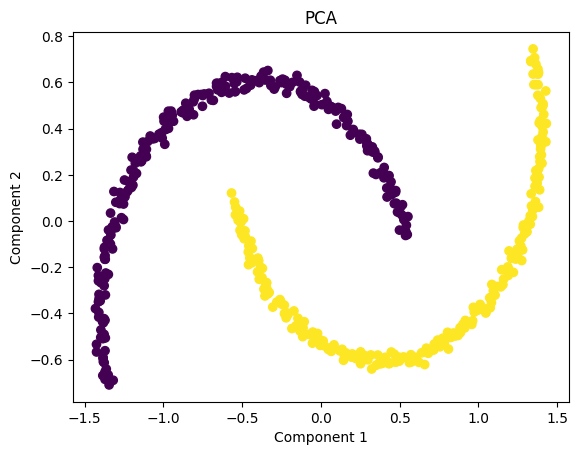

In [37]:
standard_pca = PCA(n_components = 2)
X_pca = standard_pca.fit_transform(X)

plt.title("PCA")
plt.scatter(X_pca[:, 0], X_pca[:, 1], c = y)
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()

PCA failed to distinguish the two classes

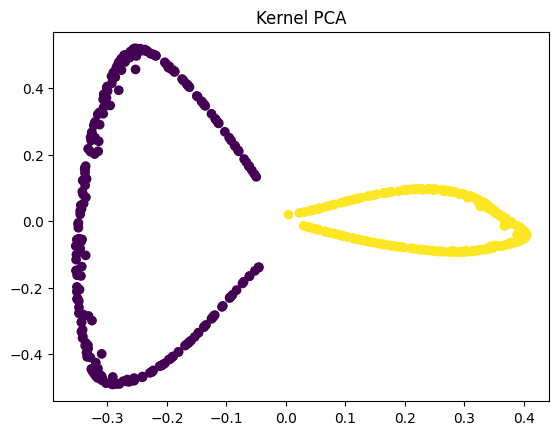

In [38]:
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(kernel ='rbf', gamma = 15)
X_kpca = kpca.fit_transform(X)

plt.title("Kernel PCA")
plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c = y)
plt.show()


Applying kernel PCA on this dataset with RBF kernel with a gamma value of 15

KernelPCA(kernel='rbf') - We say we want to use a non-linear Radial Basis Function (RBF) kernel.

gamma=15 - Parameter regulating the effect of individual points in the kernel space (larger value = more local effect).

We have not specified n_components, so KernelPCA will automatically determine all possible components.


### KernelPCA exercise 1

* Visualize in 2d datasets used in this labs (make_moons, iris, cancer and your AMP dataset) experiment with the parameters of the KernelPCA method change kernel and gamma params. Docs: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.KernelPCA.html

In [39]:
def visualize_kernel_pca(X, y, dataset_name, kernel='rbf', gamma=15):
    kpca = KernelPCA(kernel=kernel, gamma=gamma, n_components=2)
    X_kpca = kpca.fit_transform(X)
    plt.figure(figsize=(8, 6))
    plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c=y, cmap='viridis')
    plt.title(f"Kernel PCA - {dataset_name} (kernel={kernel}, gamma={gamma})")
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.show()

c:\Users\mwdzi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


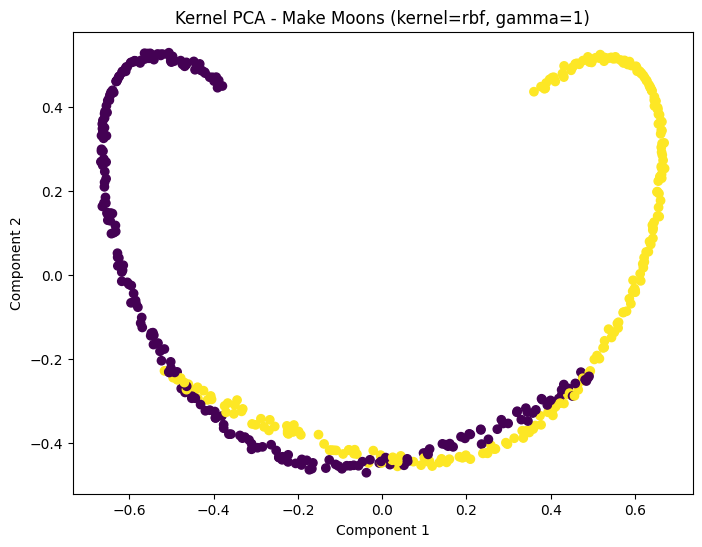

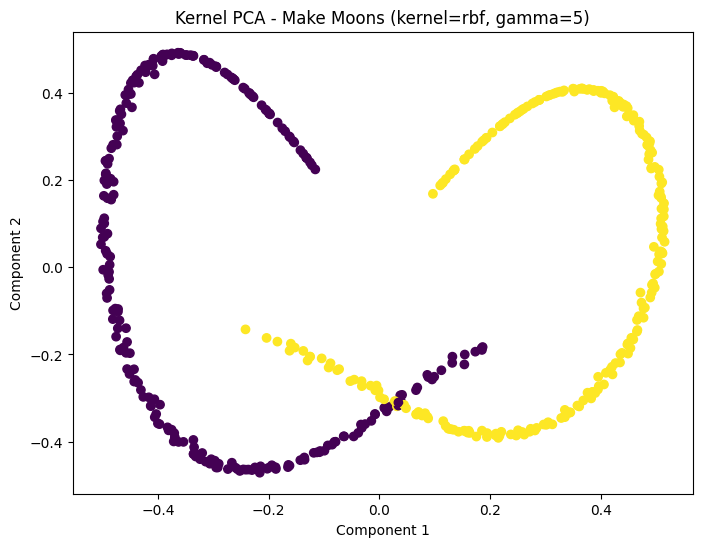

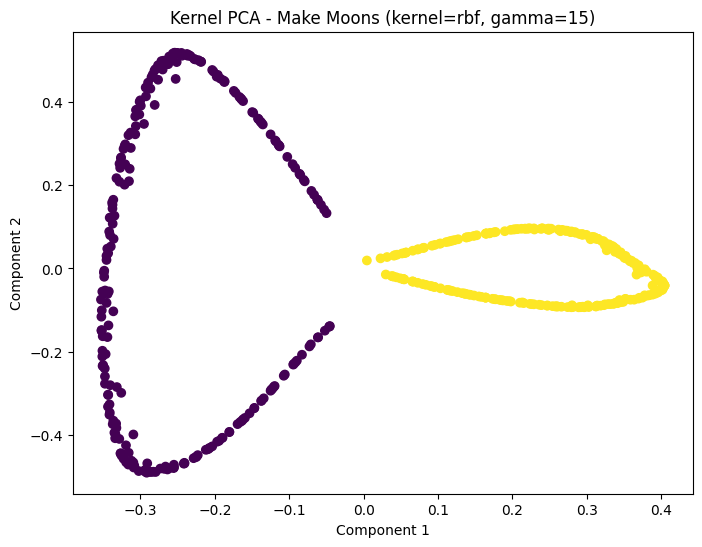

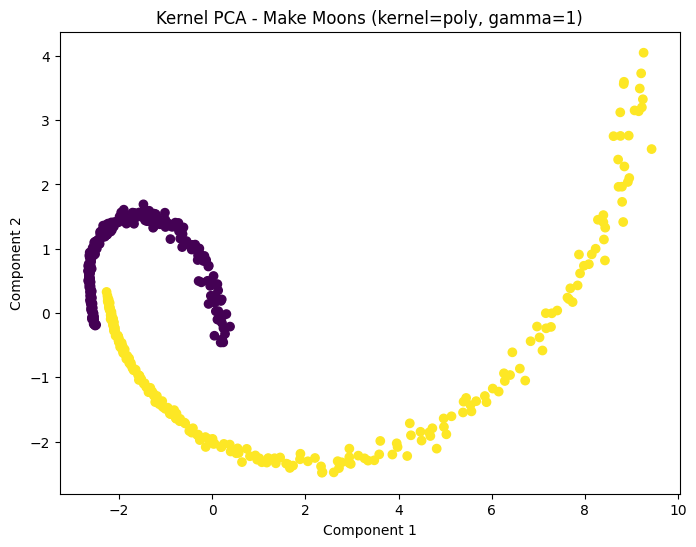

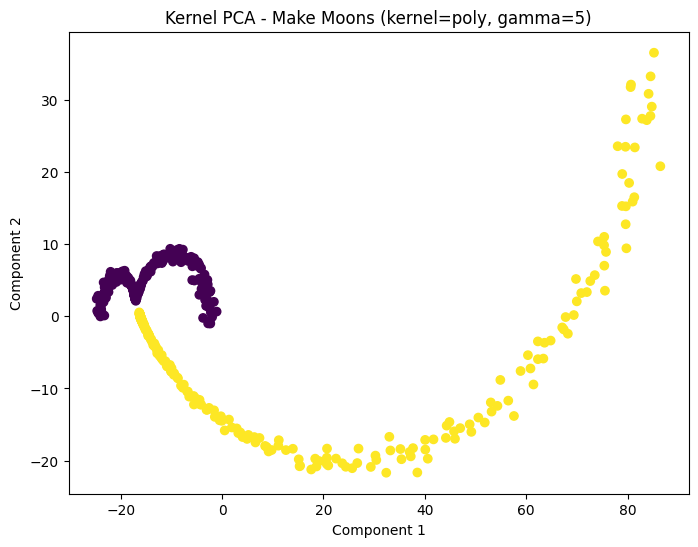

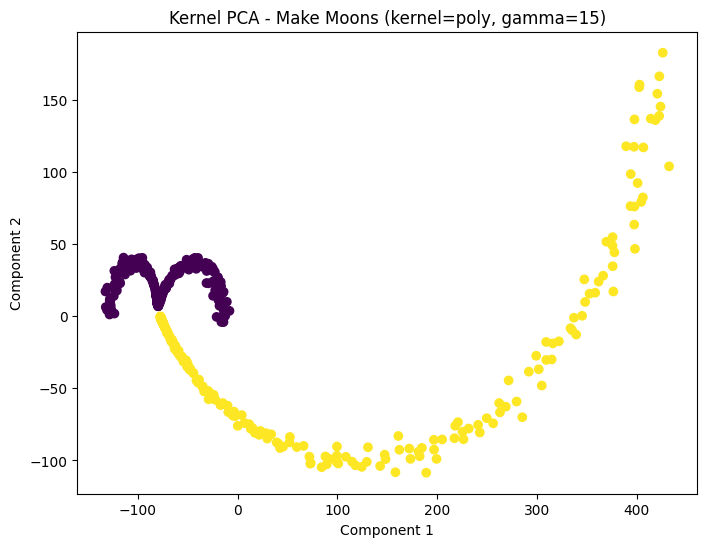

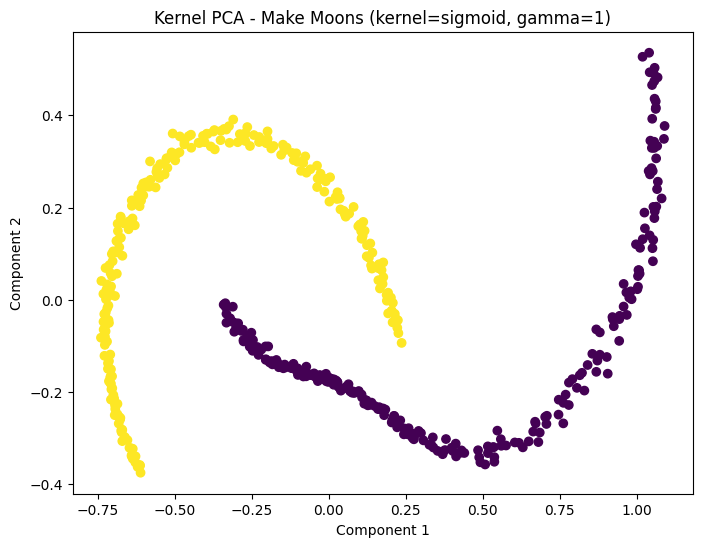

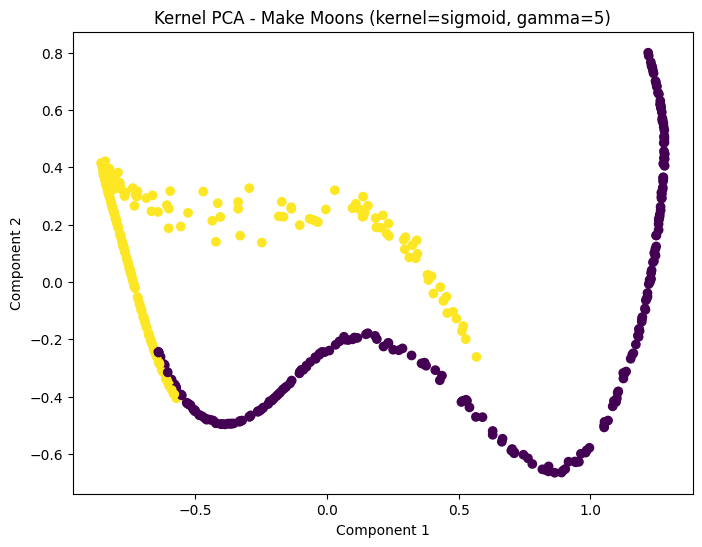

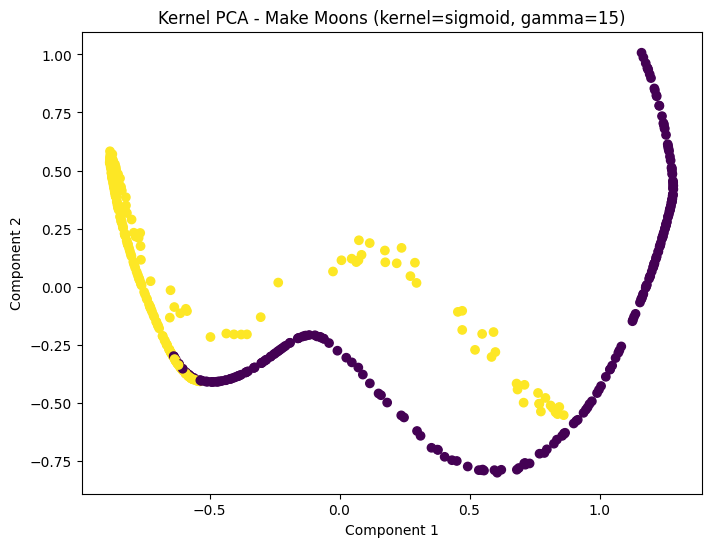

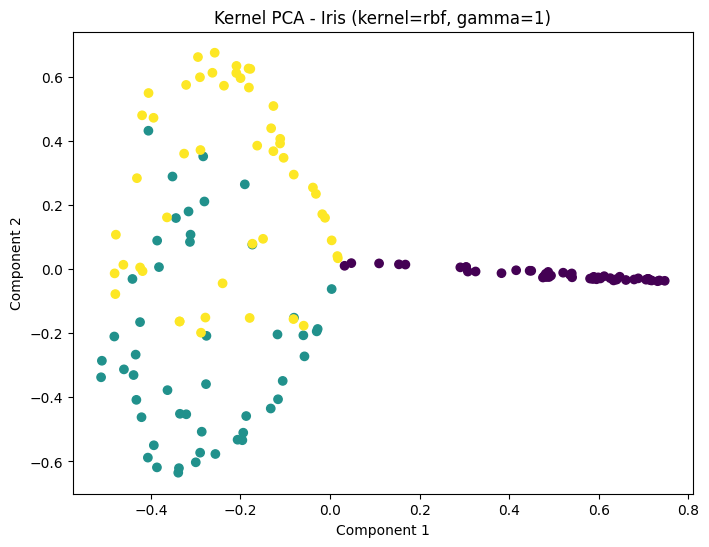

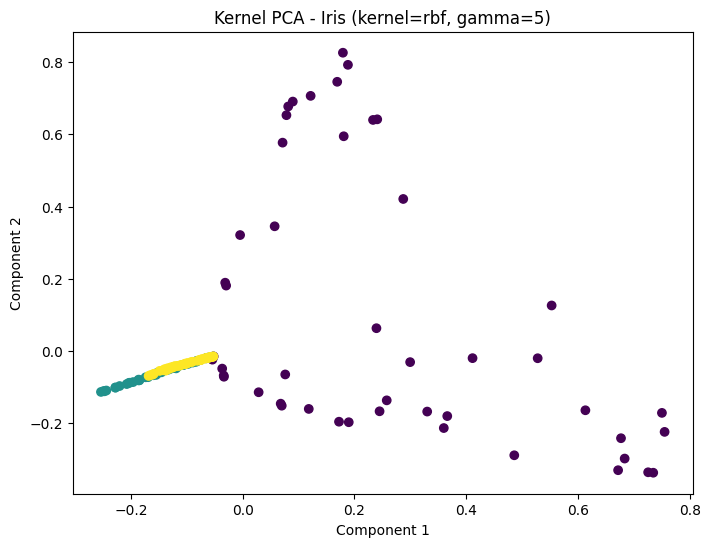

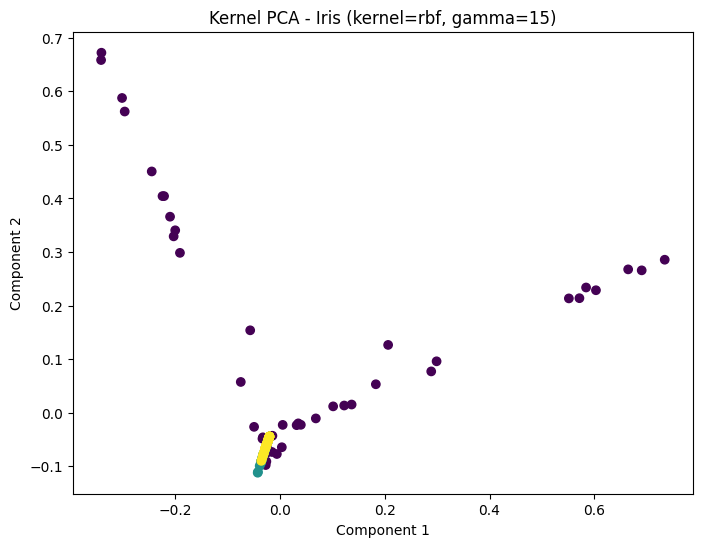

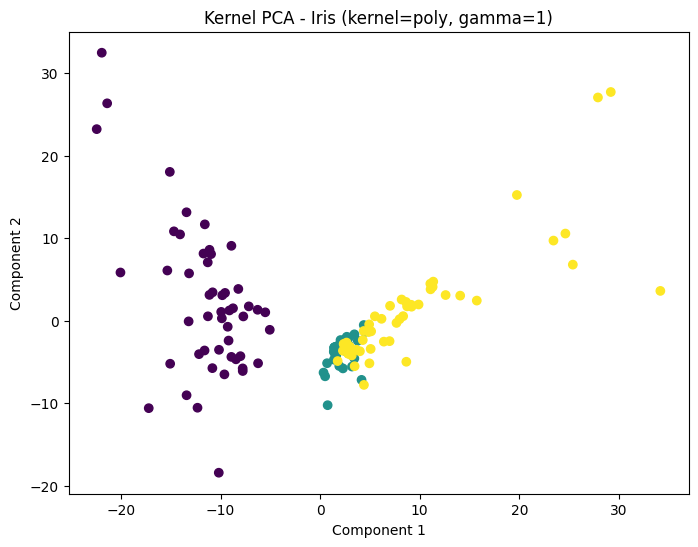

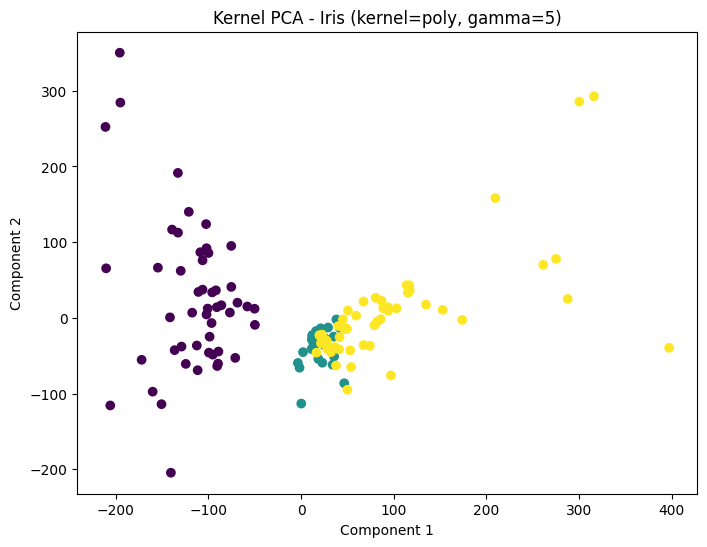

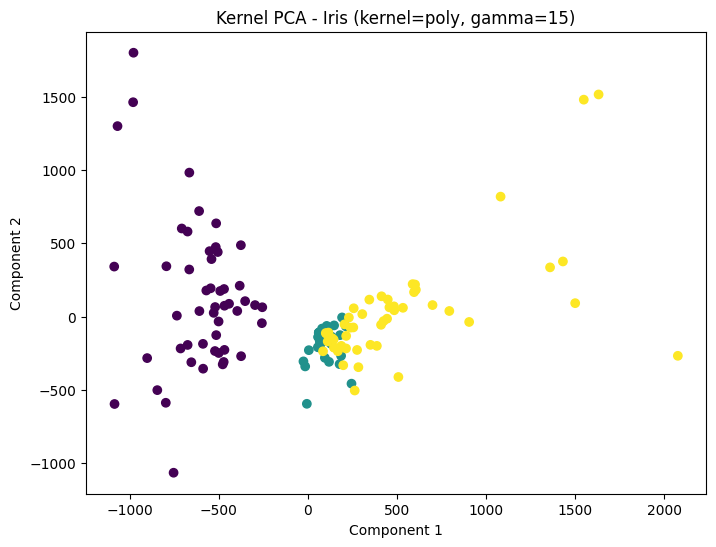

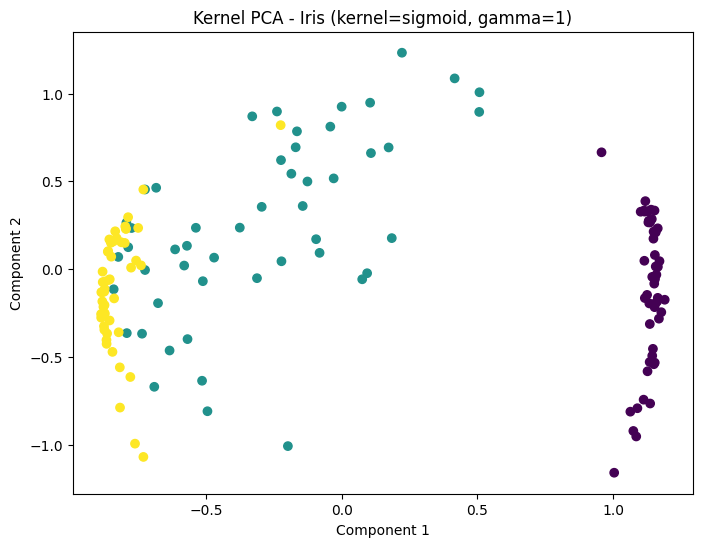

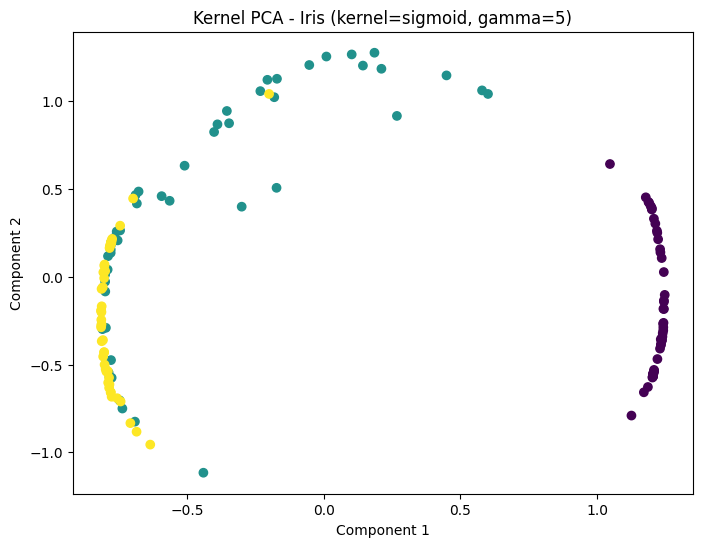

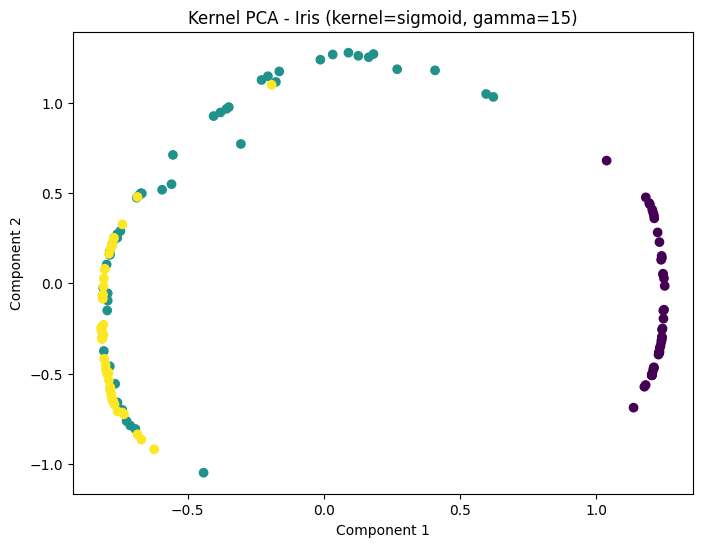

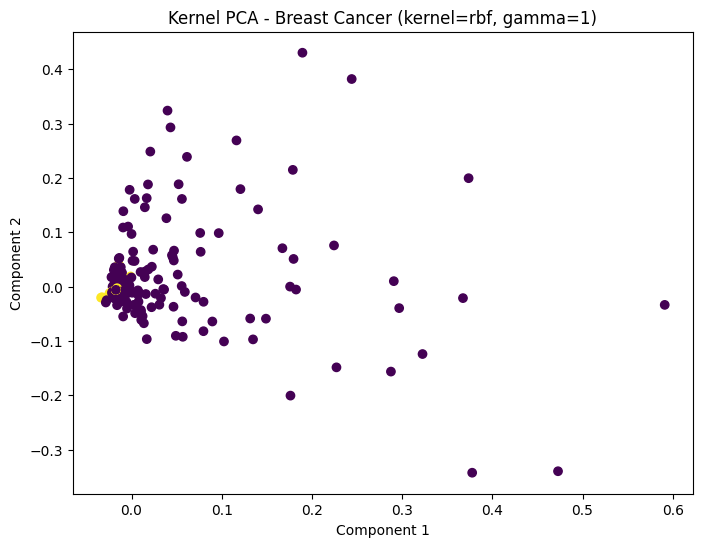

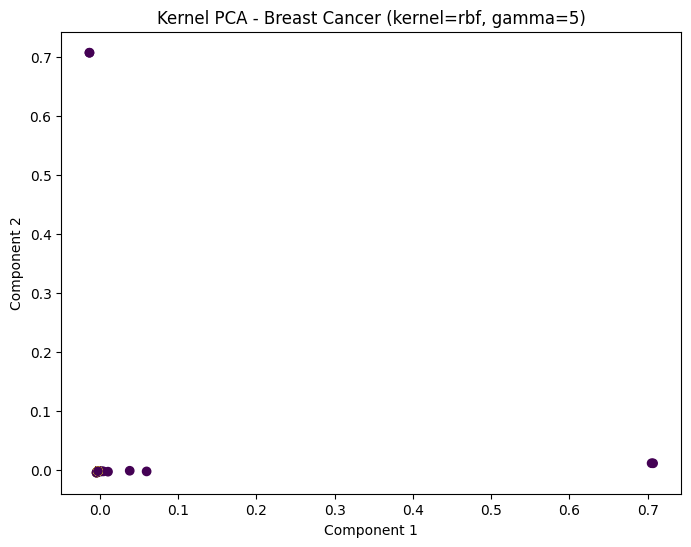

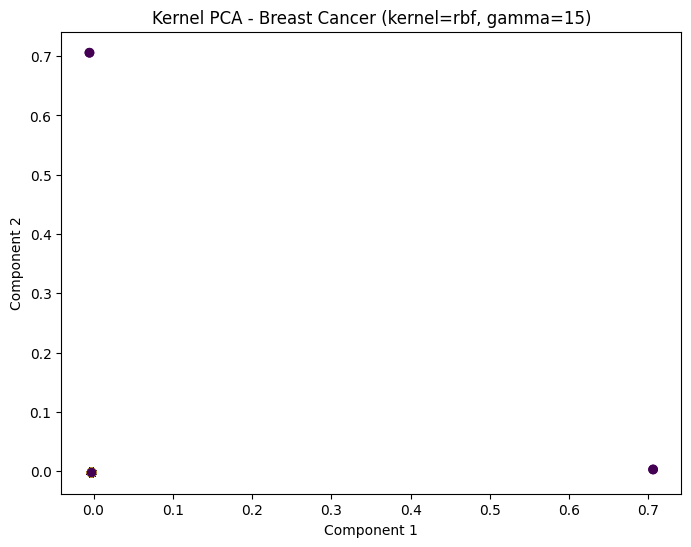

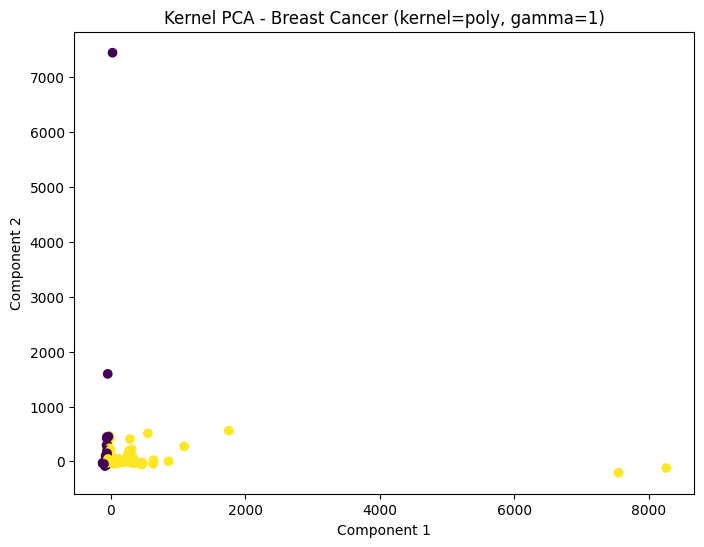

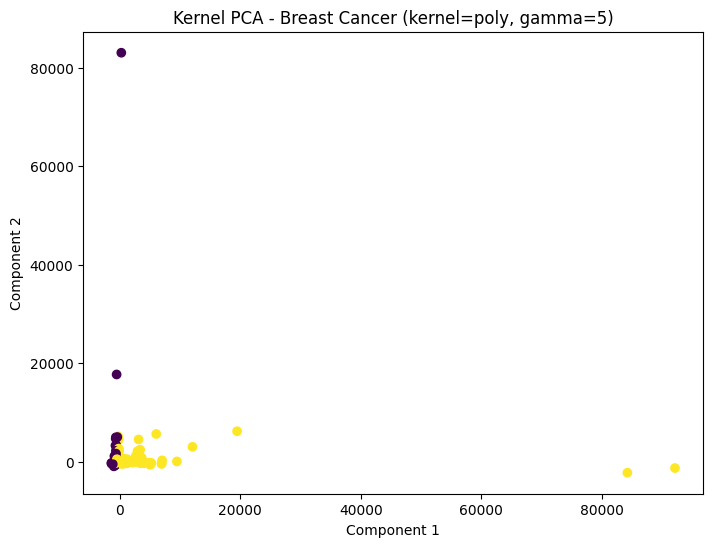

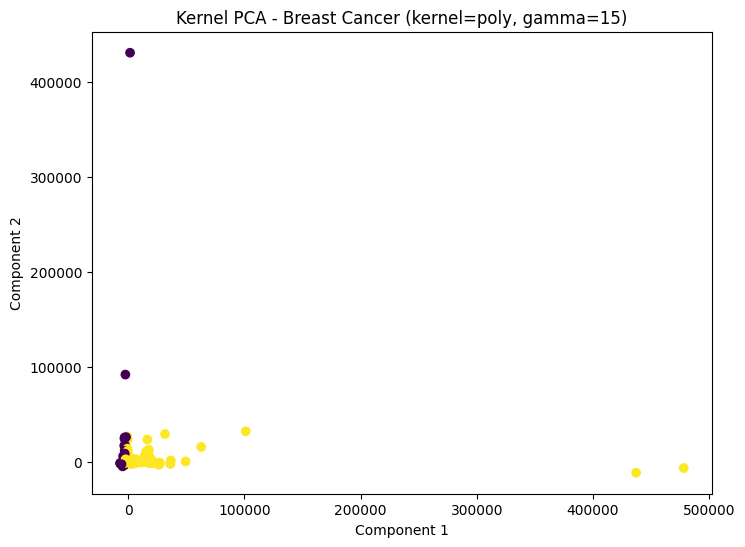

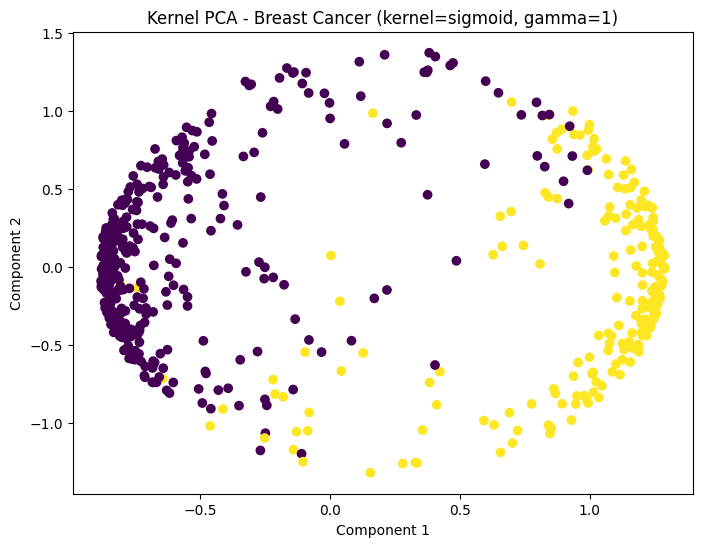

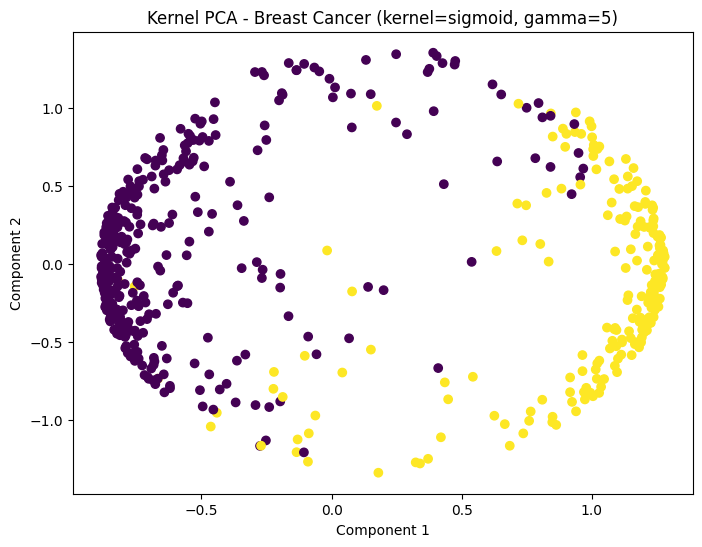

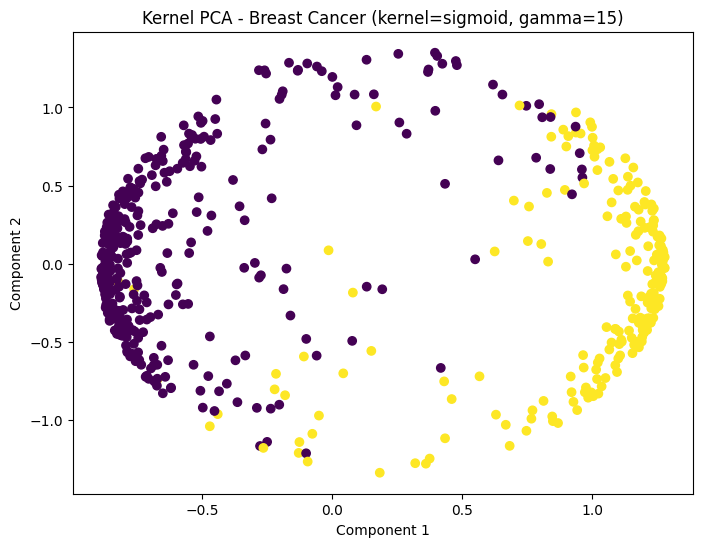

In [40]:
from sklearn.preprocessing import LabelEncoder

y_iris = LabelEncoder().fit_transform(y_iris)
cancer_y = LabelEncoder().fit_transform(cancer_y)

datasets = {
    "Make Moons": (X, y),
    "Iris": (x_iris, y_iris),
    "Breast Cancer": (cancer_x, cancer_y)
}

for dataset_name, (X, y) in datasets.items():
    for kernel in ['rbf', 'poly', 'sigmoid']:
        for gamma in [1, 5, 15]:
            visualize_kernel_pca(X, y, dataset_name, kernel=kernel, gamma=gamma)

I wasn't able to visualize the AMP dataset for these kernel PCA parameter, I kept getting errors that the maximum amount of RAM assigned to this environment was exceeded - maybe it has to do with the size of the dataset (around 45k).

### KernelPCA exercise 2
* Download the MNIST data set (there is a function to load this set in libraries such as scikit-learn, keras). It is a collection of black and white photos of handwritten digits with a resolution of 28x28 pixels. which together gives 784 dimensions.

* Try to visualize this dataset using PCA and KernelPCA, don't expect full separation of the data

* Similar to the exercises, examine explained variance. draw explained variance vs number of principal Components plot.

* Find number of principal components for 99%, 95%, 90%, and 85% of explained variance.

* Draw some sample MNIST digits and from PCA of its images transform data back to its original space (https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA.inverse_transform). Make an inverse transformation for number of components coresponding with explained variance shown above and draw the reconstructed images. The idea of this exercise is to see visually how depending on the number of components some information is lost.

* Perform the same reconstruction using KernelPCA (make comparisons for the same components number)
https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.KernelPCA.html#sklearn.decomposition.KernelPCA.inverse_transform


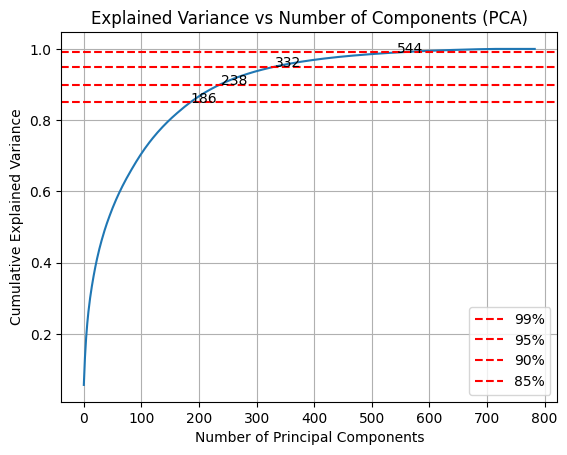

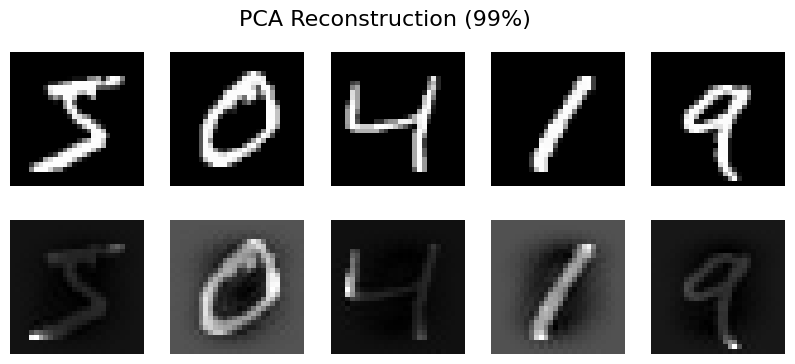

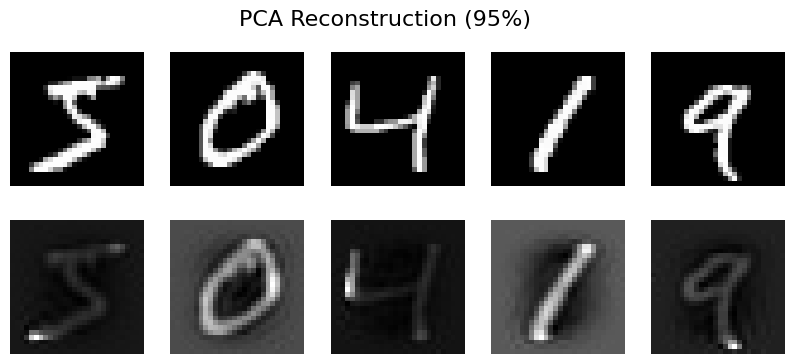

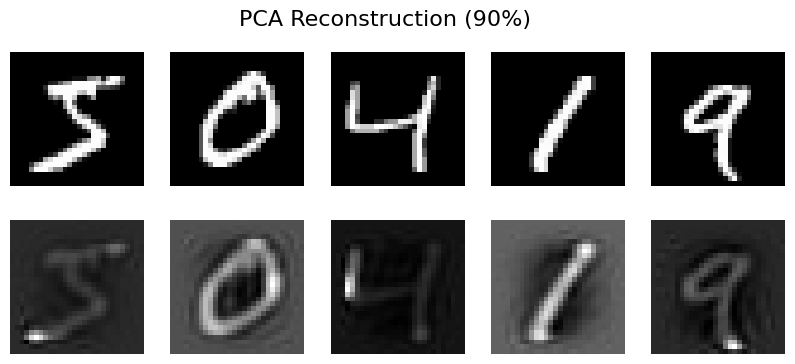

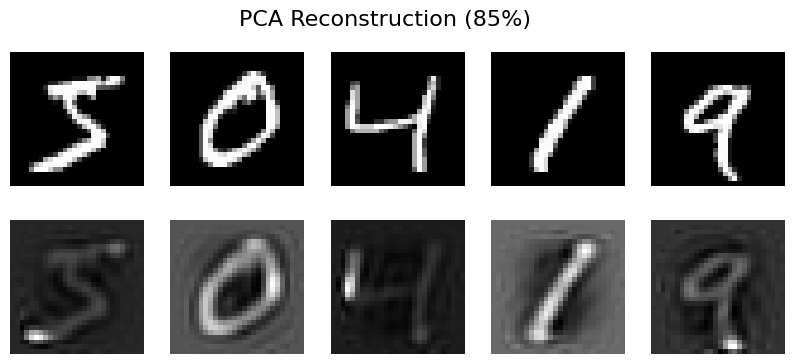

In [41]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA, KernelPCA
from sklearn.preprocessing import StandardScaler

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist.data, mnist.target
X = X / 255.0 

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA()
pca.fit(X_scaled)

explained_variance_ratios = np.cumsum(pca.explained_variance_ratio_)
n_components_dict = {}
thresholds = [0.99, 0.95, 0.90, 0.85]
for threshold in thresholds:
    n_components_dict[threshold] = np.argmax(explained_variance_ratios >= threshold) + 1

plt.plot(explained_variance_ratios)
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance vs Number of Components (PCA)")
plt.grid(True)
for threshold, num_components in n_components_dict.items():
    plt.axhline(threshold, color='r', linestyle='--', label=f"{threshold*100:.0f}%")
    plt.text(num_components, threshold, str(num_components))

plt.legend()
plt.show()

def plot_reconstruction(X_original, X_reconstructed, title, n_samples=5):
    fig, axes = plt.subplots(2, n_samples, figsize=(10, 4))
    fig.suptitle(title, fontsize=16)
    for i in range(n_samples):
        axes[0, i].imshow(X_original[i].reshape(28, 28), cmap='gray')
        axes[0, i].axis('off')
        axes[1, i].imshow(X_reconstructed[i].reshape(28, 28), cmap='gray')
        axes[1, i].axis('off')
    plt.show()

for threshold, n_components in n_components_dict.items():
    pca_threshold = PCA(n_components=n_components)
    X_pca = pca_threshold.fit_transform(X_scaled)
    X_reconstructed = pca_threshold.inverse_transform(X_pca)
    plot_reconstruction(X, X_reconstructed, f"PCA Reconstruction ({threshold * 100:.0f}%)")

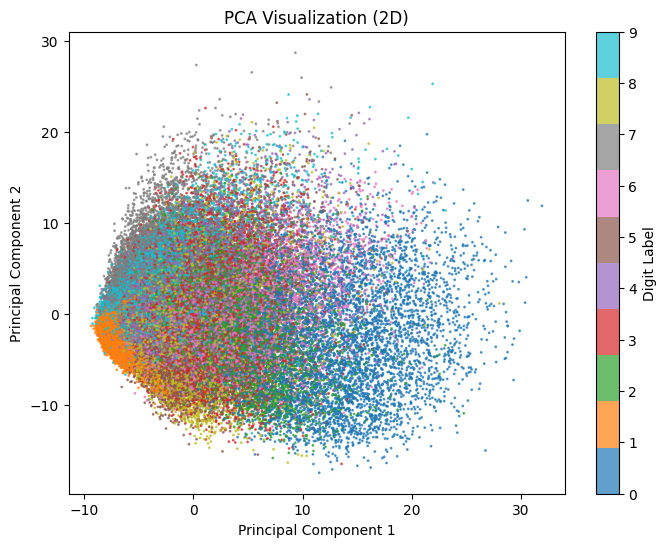

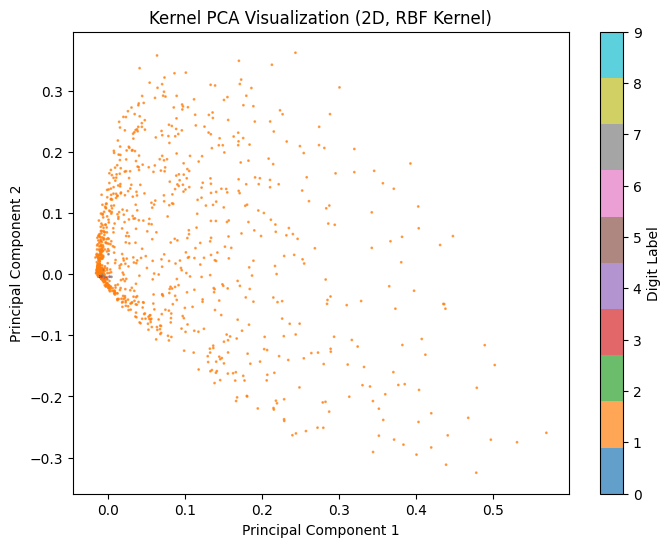

In [ ]:
from sklearn.utils import shuffle

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y.astype(int), cmap='tab10', s=1, alpha=0.7)
plt.colorbar(label='Digit Label')
plt.title("PCA Visualization (2D)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

X_subset, y_subset = shuffle(X_scaled, y, random_state=42, n_samples=10000)

kpca = KernelPCA(kernel='rbf', gamma=0.04, n_components=200)
X_kpca = kpca.fit_transform(X_subset)

plt.figure(figsize=(8, 6))
plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c=y_subset.astype(int), cmap='tab10', s=1, alpha=0.7)
plt.colorbar(label='Digit Label')
plt.title("Kernel PCA Visualization (2D, RBF Kernel)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

The visualization of the Kernel PCA couldn't be performed with the entire dataset, instead a shuffled subset consisting of 10000 samples was used. The PCA Kernel for all 70000 samples was too big and couldn't be allocated in memory, for the same reason the PCA wasn't performed for the number of components corresponding to the variance tresholds - it was too computationally expensive. The 2D visualization of the PCA dataset on the 2D plane doesn't give much clues to what is going on. Examination of the reconstructed images looks good - the numbers can be clearly made out. As the cumulative variance increases, the representations become more detailed, but the shape of the number can be clearly made out even for the lowest value (85% total variance explained).

## Useful links
https://medium.com/data-science/introduction-to-principal-component-analysis-pca-with-python-code-69d3fcf19b57

https://medium.com/data-science/introduction-to-principal-component-analysis-pca-with-python-code-69d3fcf19b57

https://medium.com/data-science/kernel-pca-vs-pca-vs-ica-in-tensorflow-sklearn-60e17eb15a64